In [1]:
%matplotlib inline

import sys
sys.path.append('../')

from agentsClasses.OfflineDQNClass import OfflineDQNAgent, OfflineDDQNAgent
from utilities.plots import create_grids, plot_trajectory

In [2]:
#Hyperparameters
show_stats = True      # show stats
render = True           # render the results after training

NUM_DQN_AGENTS = 2      # number of DQN agents
NUM_DDQN_AGENTS = 2     # number of DDQN agents

NUM_NEURONS_FC1 = 128   # number of neurons for the first fully connected layer
NUM_NEURONS_FC2 = 128   # number of neurons for the second fully connected layer

SHAPE = "14x14"             # "5x5" or "14x14"

if SHAPE == "5x5":
    N_MODELS = 9
    EPISODES_PER_AGENT = 1000
    MAX_STEPS_PER_EPISODE = 100
elif SHAPE == "14x14":
    N_MODELS = 15
    EPISODES_PER_AGENT = 2500   #en funcion del numero de episodios total va a bajar mas o menos rapido el epsilon
    MAX_STEPS_PER_EPISODE = 300

REWARD = [100, -10, 0.5]     #REARD, PENALTY, PENALTY_THRESHOLD

EPS_START = 1.0         # epsilon start value
EPS_END = 0.01          # epsilon end value
EPS_DECAY = 0.996       # epsilon decay rate
#EPS_DECAY = EPS_START/(EPISODES_PER_AGENT/2)

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network

In [3]:
#CREATING AND TRAINING THE AGENTS
agents_arr = []         # array of agents

print("Starting training of", NUM_DQN_AGENTS, "DQN agents and", NUM_DDQN_AGENTS, "DDQN agents")

for i in range(NUM_DQN_AGENTS+NUM_DDQN_AGENTS):
    if i < NUM_DQN_AGENTS:
        print("DQN Agent", i+1,"/",NUM_DQN_AGENTS)    # if the agent is a DQN agent
        agent = OfflineDQNAgent(i, "DQN", SHAPE, NUM_NEURONS_FC1, NUM_NEURONS_FC2, N_MODELS, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, REWARD, EPS_START, EPS_END, EPS_DECAY, BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR, UPDATE_EVERY)
    else:
        print("DDQN Agent", i+1-NUM_DQN_AGENTS,"/",NUM_DDQN_AGENTS)  # if the agent is a DDQN agent 
        agent = OfflineDDQNAgent(i, "DDQN", SHAPE, NUM_NEURONS_FC1, NUM_NEURONS_FC2, N_MODELS, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, REWARD, EPS_START, EPS_END, EPS_DECAY, BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR, UPDATE_EVERY)

    agent.train()
    agents_arr.append(agent)

Starting training of 2 DQN agents and 2 DDQN agents
DQN Agent 1 / 2
Loading models...
Models loaded


100%|██████████| 1500/1500 [24:51<00:00,  1.01it/s]


DQN Agent 2 / 2
Loading models...
Models loaded


100%|██████████| 1500/1500 [19:42<00:00,  1.27it/s]


DDQN Agent 1 / 2
Loading models...
Models loaded


100%|██████████| 1500/1500 [26:27<00:00,  1.06s/it]


DDQN Agent 2 / 2
Loading models...
Models loaded


100%|██████████| 1500/1500 [28:47<00:00,  1.15s/it]


La longitud estimada para el eje X del training error es: 4621648.0
Agent 1 steps stats: 
  -Average: 192.57 
  -Std dev: 102.68 
   -Median: 196 
     -Best: 30


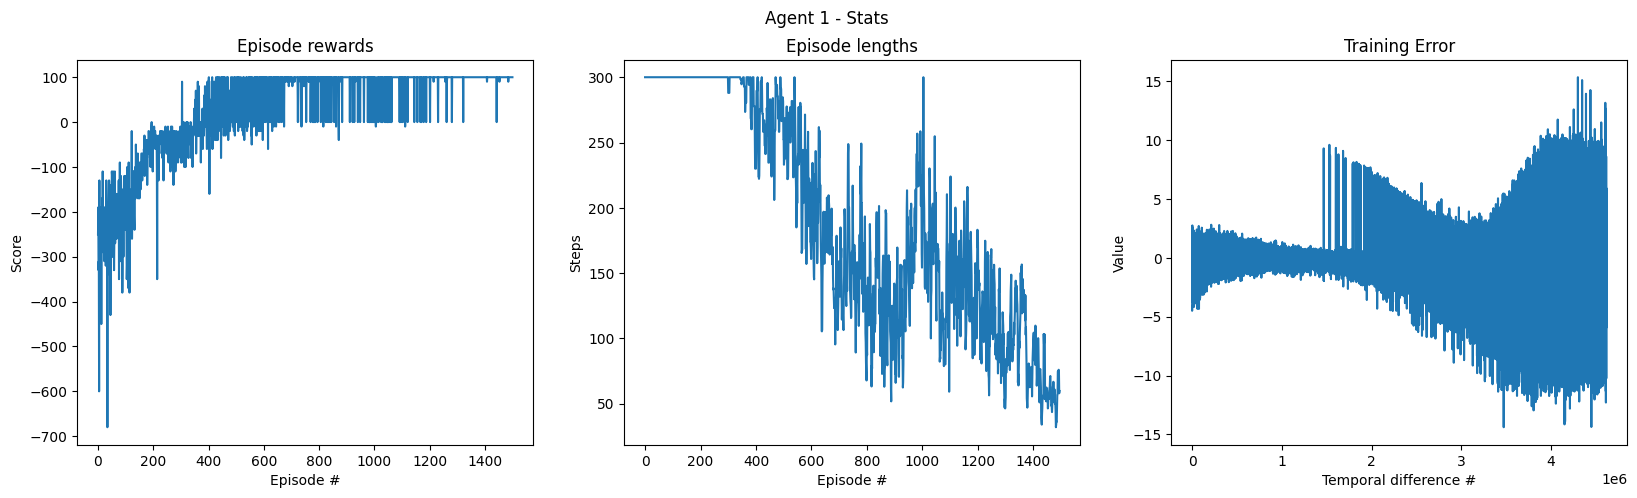

La longitud estimada para el eje X del training error es: 3672768.0
Agent 2 steps stats: 
  -Average: 153.03 
  -Std dev: 112.39 
   -Median: 107 
     -Best: 34


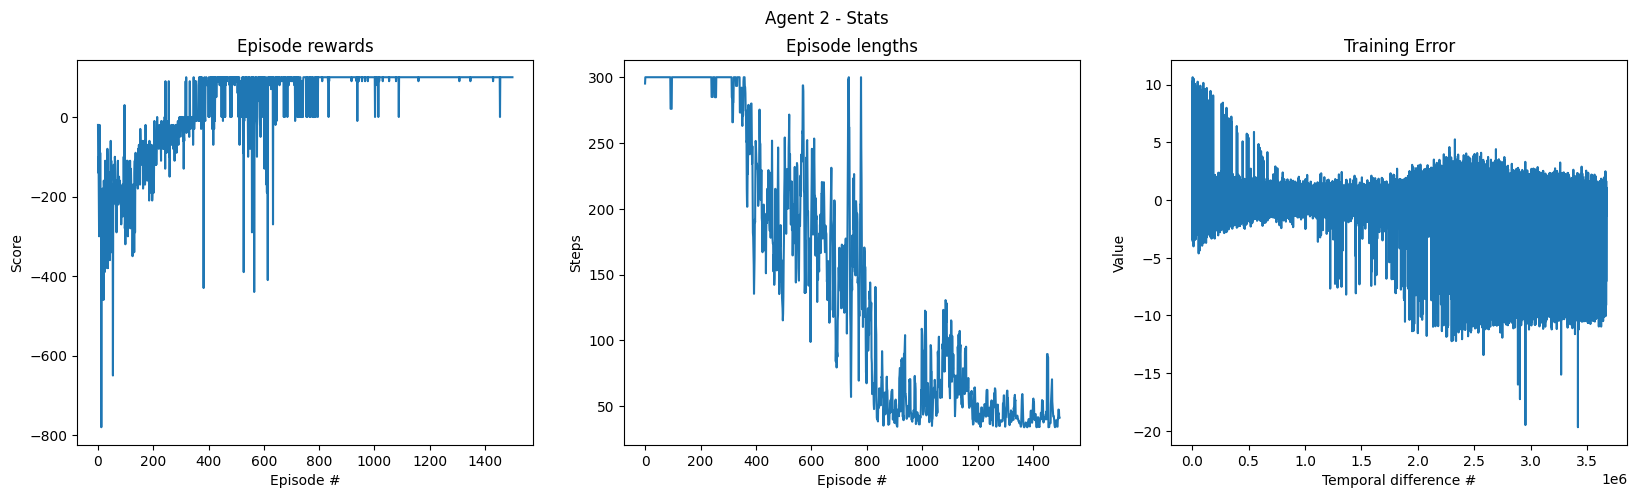

La longitud estimada para el eje X del training error es: 4916352.0
Agent 3 steps stats: 
  -Average: 204.85 
  -Std dev: 104.6 
   -Median: 255 
     -Best: 30


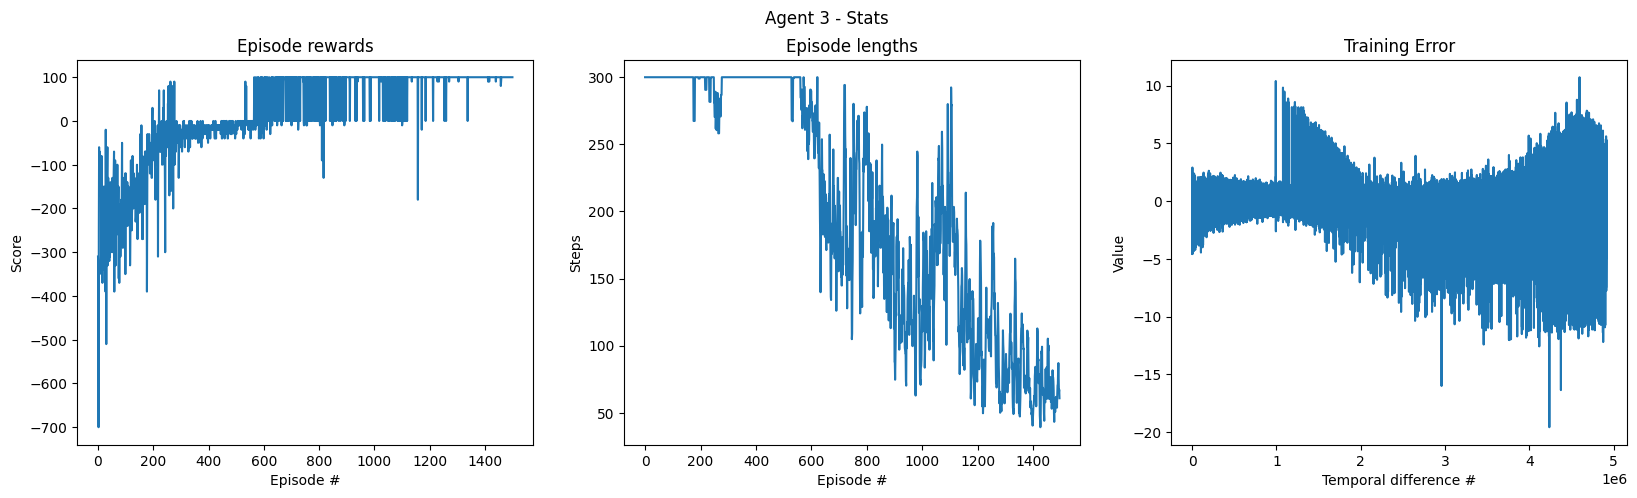

La longitud estimada para el eje X del training error es: 5382944.0
Agent 4 steps stats: 
  -Average: 224.29 
  -Std dev: 101.07 
   -Median: 300 
     -Best: 30


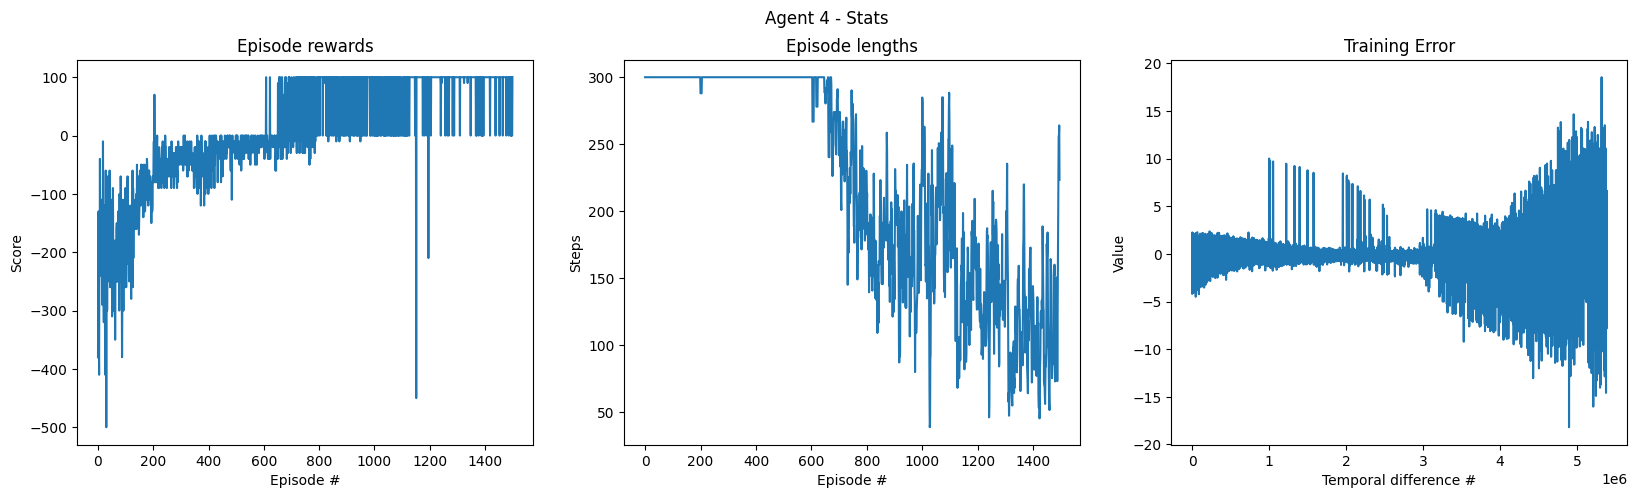

In [7]:
if show_stats:
    for agent in agents_arr:
        print("La longitud estimada para el eje X del training error es:", (agent.total_steps/UPDATE_EVERY)*BATCH_SIZE)
        agent.plot_results(rolling_length=5, rolling_error=10)

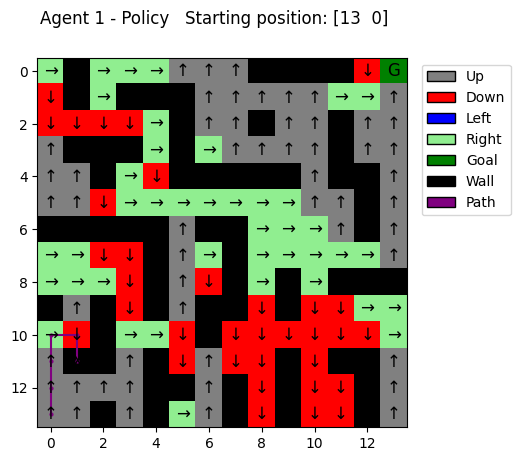

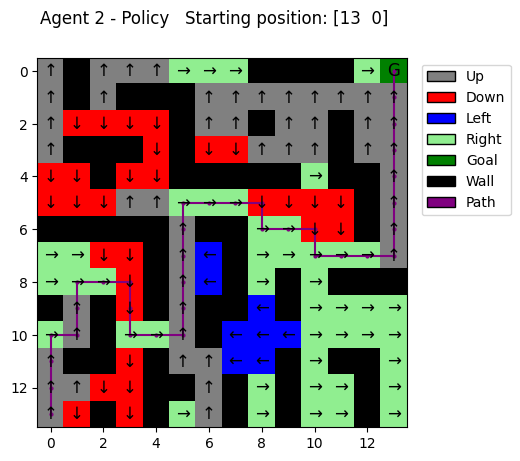

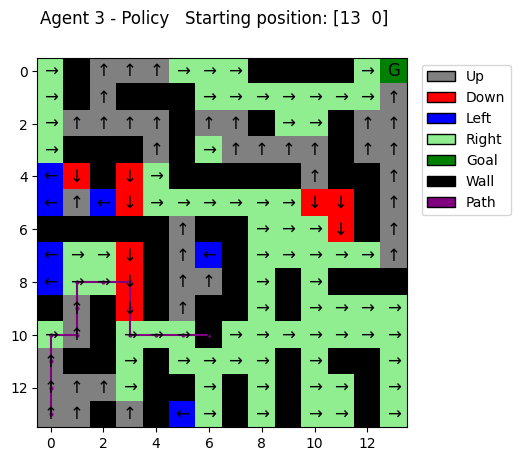

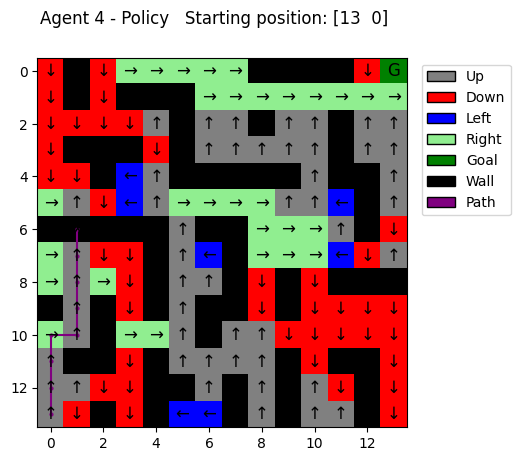

In [5]:
for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent.env, Qnet=agent.qnetwork_local)
    start_pos = agent.env.unwrapped.start_pos

    if render:
        plot_trajectory(string_policy_grid, start_pos, agent.id+1)


In [6]:
#Hay muchos elementos en el rewardHistory que son iguales, quiero que solo haya uno de cada
#historico = dict.fromkeys(agent.env.unwrapped.rewardHistory)

print(len(agent.env.unwrapped.rewardHistory))

unicos = []

for i in agent.env.unwrapped.rewardHistory:

    stringo = str(i[0][0]) + ',' + str(i[0][1]) + ',' + str(i[1]) + ',' + str(i[2][0]) + ',' + str(i[2][1])
    
    if stringo not in unicos:
        unicos.append(stringo)

for stringo in unicos:
    print(stringo)

4943
13,0,3,13,0
10,0,0,9,0
10,4,0,9,4
10,4,1,10,4
8,0,0,7,0
5,3,3,5,3
5,1,2,5,0
5,1,3,5,2
5,2,3,5,3
4,3,2,4,3
11,13,2,11,13
5,0,0,5,0
0,4,2,0,3
0,3,3,0,4
6,13,2,6,13
2,12,3,2,12
3,13,2,3,12
0,12,2,0,11
